
#  Credit Scoring Model
### Internship Task – CodeAlpha

## Objective
Predict an individual's creditworthiness using past financial data.

## Approach
Apply classification algorithms:
- Logistic Regression
- Decision Tree
- Random Forest

## Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

---


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")


In [2]:

# Generate synthetic financial dataset
X, y = make_classification(n_samples=2000,
                           n_features=8,
                           n_informative=6,
                           n_redundant=2,
                           random_state=42)

columns = ['Income', 'Debt', 'Credit_History_Length',
           'Loan_Amount', 'Age', 'Number_of_Credit_Cards',
           'Late_Payments', 'Savings']

X = pd.DataFrame(X, columns=columns)
y = pd.Series(y, name="Creditworthiness")

print("Dataset Shape:", X.shape)
X.head()


Dataset Shape: (2000, 8)


,Income,Debt,Credit_History_Length,Loan_Amount,Age,Number_of_Credit_Cards,Late_Payments,Savings
0,-1.399671,-0.220125,-1.635934,-0.006001,-1.406480,-0.314931,0.256710,1.089211
1,-0.468383,-0.719567,-0.430117,-3.409355,1.584517,-2.385020,1.263859,-2.323901
2,1.403872,-0.996446,-0.691477,-0.248094,-1.053228,-0.943900,-0.721493,-1.771557
3,-3.755039,-0.066449,-2.859358,-0.708682,2.064430,0.192349,0.271833,0.523567
4,-1.650145,-0.819930,-1.821735,-0.181442,1.536222,0.282311,0.443228,0.009051


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model: LogisticRegression
Accuracy: 0.8075

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       201
           1       0.83      0.77      0.80       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



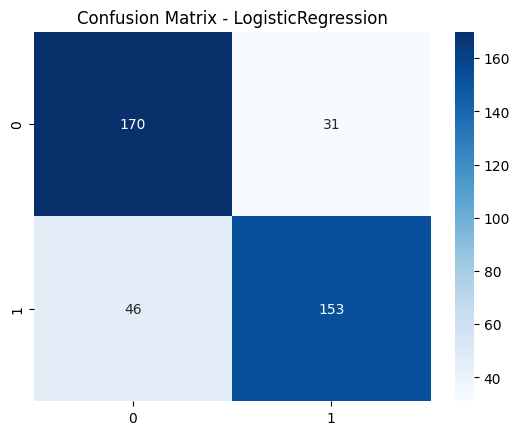

ROC-AUC Score: 0.892547313682842
--------------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       201
           1       0.87      0.91      0.89       199

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



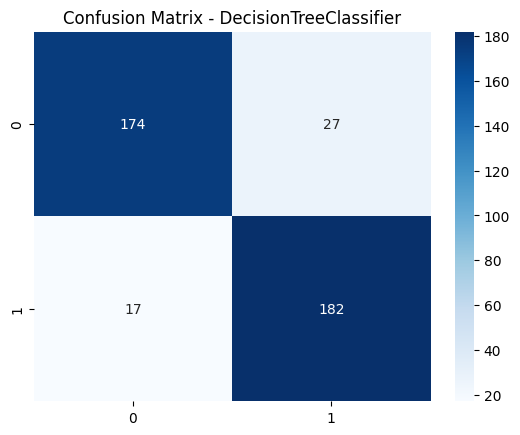

ROC-AUC Score: 0.928123203080077
--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.9275

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       201
           1       0.95      0.90      0.93       199

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



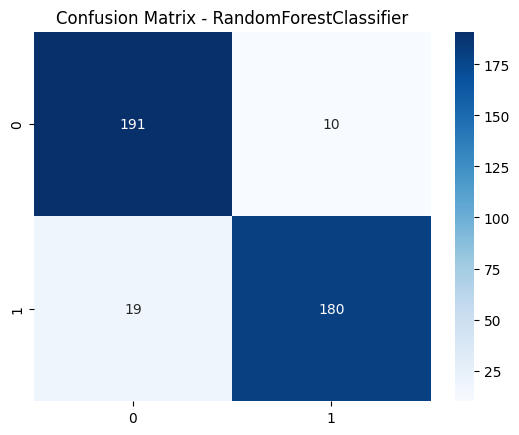

ROC-AUC Score: 0.9734868371709293
--------------------------------------------------


In [5]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

    y_prob = model.predict_proba(X_test)[:,1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("-"*50)

# Evaluate Models
evaluate_model(log_model, X_test_scaled, y_test)
evaluate_model(dt_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)


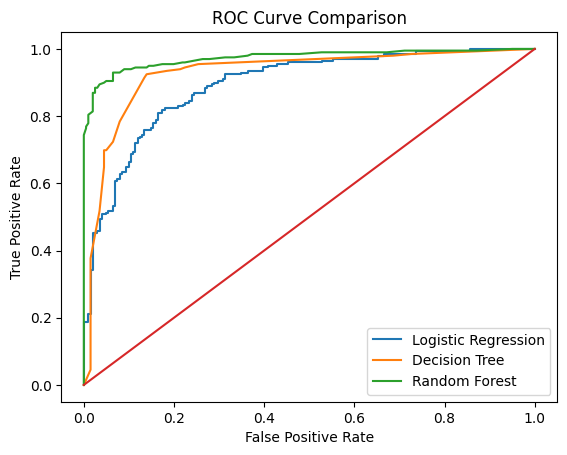

In [6]:

plt.figure()

for model, X_eval, name in [
    (log_model, X_test_scaled, "Logistic Regression"),
    (dt_model, X_test, "Decision Tree"),
    (rf_model, X_test, "Random Forest")
]:
    y_prob = model.predict_proba(X_eval)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
